In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [13]:
df=pd.read_csv('Titanic_dataset_kaggle.csv')

In [14]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [16]:
df.drop(columns=['PassengerId', 'Pclass', 'Name', 'Parch', 'Cabin', 'Embarked'], inplace=True)



In [17]:
df.head()

,Survived,Sex,Age,SibSp,Ticket,Fare
0,0,male,34.5,0,330911,7.8292
1,1,female,47.0,1,363272,7.0000
2,0,male,62.0,0,240276,9.6875
3,0,male,27.0,0,315154,8.6625
4,1,female,22.0,1,3101298,12.2875


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Ticket    418 non-null    object 
 5   Fare      417 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


In [19]:
 df.isnull().mean()

Survived    0.000000
Sex         0.000000
Age         0.205742
SibSp       0.000000
Ticket      0.000000
Fare        0.002392
dtype: float64

In [20]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [22]:
x_train.shape,x_test.shape

((334, 5), (84, 5))

In [23]:
x_train.isnull().mean()

Sex       0.000000
Age       0.215569
SibSp     0.000000
Ticket    0.000000
Fare      0.002994
dtype: float64

In [24]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()
mean_fare=x_train['Fare'].mean()
median_age=x_train['Fare'].median()


In [25]:
x_train['Age_median']=x_train['Age'].fillna(median_age)
x_train['Age_mean']=x_train['Age'].fillna(mean_age)

x_train['Fare_median']=x_train['Fare'].fillna(median_age)
x_train['Fare_mean']=x_train['Fare'].fillna(mean_age)


In [26]:
x_train.sample(5)

,Sex,Age,SibSp,Ticket,Fare,Age_median,Age_mean,Fare_median,Fare_mean
14,female,47.0,1,W.E.P. 5734,61.1750,47.0000,47.000000,61.1750,61.1750
133,male,NaN,1,2621,6.4375,14.1083,29.307252,6.4375,6.4375
42,male,41.0,0,SOTON/O.Q. 3101263,7.8500,41.0000,41.000000,7.8500,7.8500
345,female,16.0,0,348125,7.6500,16.0000,16.000000,7.6500,7.6500
181,male,37.0,1,PC 17756,83.1583,37.0000,37.000000,83.1583,83.1583


In [27]:
print('Original Age Varival variance',x_train['Age'].var())
print('Age variance after median imputation: ',x_train['Age_median'].var())
print('Age variance after mean imputation: ',x_train['Age_mean'].var())

print('Original Fare Varival variance',x_train['Fare'].var())
print('Age variance after median imputation: ',x_train['Fare_median'].var())
print('Age variance after mean imputation: ',x_train['Fare_mean'].var())


Original Age Varival variance 184.7040299669505
Age variance after median imputation:  183.9485591392075
Age variance after mean imputation:  144.76802348760975
Original Fare Varival variance 2333.007047160699
Age variance after median imputation:  2327.1458643048404
Age variance after mean imputation:  2326.057818478697


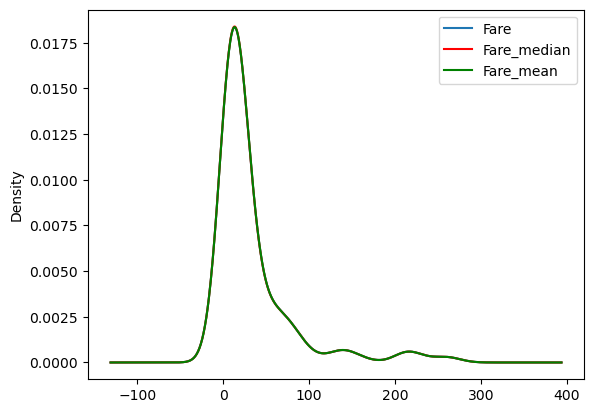

In [28]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()


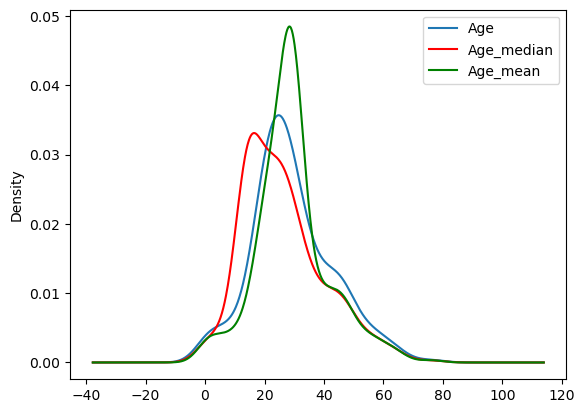

In [29]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot()

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

plt.show()


In [30]:
x_train.select_dtypes(include=['number']).cov()


,Age,SibSp,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,184.704030,-1.556549,216.034928,184.704030,184.704030,212.196215,214.012679
SibSp,-1.556549,0.677105,6.393226,-0.608607,-1.219998,6.398818,6.379549
Fare,216.034928,6.393226,2333.007047,236.037859,168.654128,2333.007047,2333.007047
Age_median,184.704030,-0.608607,236.037859,183.948559,144.768023,233.304931,234.878190
Age_mean,184.704030,-1.219998,168.654128,144.768023,144.768023,166.315953,167.739667
Fare_median,212.196215,6.398818,2333.007047,233.304931,166.315953,2327.145864,2326.256021
Fare_mean,214.012679,6.379549,2333.007047,234.878190,167.739667,2326.256021,2326.057818


In [31]:
x_train.select_dtypes(include=['number']).corr()


,Age,SibSp,Fare,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,-0.129766,0.302479,1.000000,1.000000,0.295082,0.297717
SibSp,-0.129766,1.000000,0.160677,-0.054533,-0.123224,0.161198,0.160750
Fare,0.302479,0.160677,1.000000,0.363319,0.292746,1.000000,1.000000
Age_median,1.000000,-0.054533,0.363319,1.000000,0.887132,0.356586,0.359074
Age_mean,1.000000,-0.123224,0.292746,0.887132,1.000000,0.286540,0.289061
Fare_median,0.295082,0.161198,1.000000,0.356586,0.286540,1.000000,0.999851
Fare_mean,0.297717,0.160750,1.000000,0.359074,0.289061,0.999851,1.000000


<Axes: >

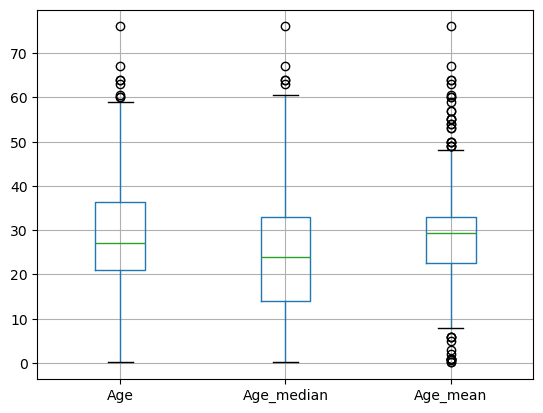

In [32]:
x_train[['Age', 'Age_median', 'Age_mean']].boxplot()


<Axes: >

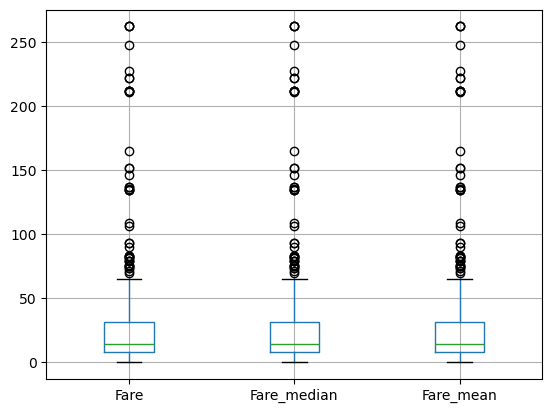

In [33]:
x_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

# using sklearn

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


In [35]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [40]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [41]:
trf.fit(x_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [42]:
trf.named_transformers_['imputer1'].statistics_

array([27.])

In [43]:
trf.named_transformers_['imputer2'].statistics_

array([36.90913514])

In [44]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [45]:
x_train

array([[32.0, 13.0, 'male', 0, '244360'],
       [24.0, 31.5, 'male', 2, 'C.A. 31029'],
       [27.0, 10.7083, 'male', 0, '240261'],
       ...,
       [46.0, 75.2417, 'male', 0, '13050'],
       [24.0, 13.5, 'male', 0, '248726'],
       [27.0, 7.75, 'male', 0, '365235']], dtype=object)